## LAB 2 Analysis
### Alejandro Mejia - 20160055
--------------------------------------------------------------------
**Data Domain:** 
***(18/12/2018) to (24/12/2018)
### Filtrando Undefined:
**Original Count -** 175
**Variation 1 Count -** 341
**Variation 2 Count -** 788

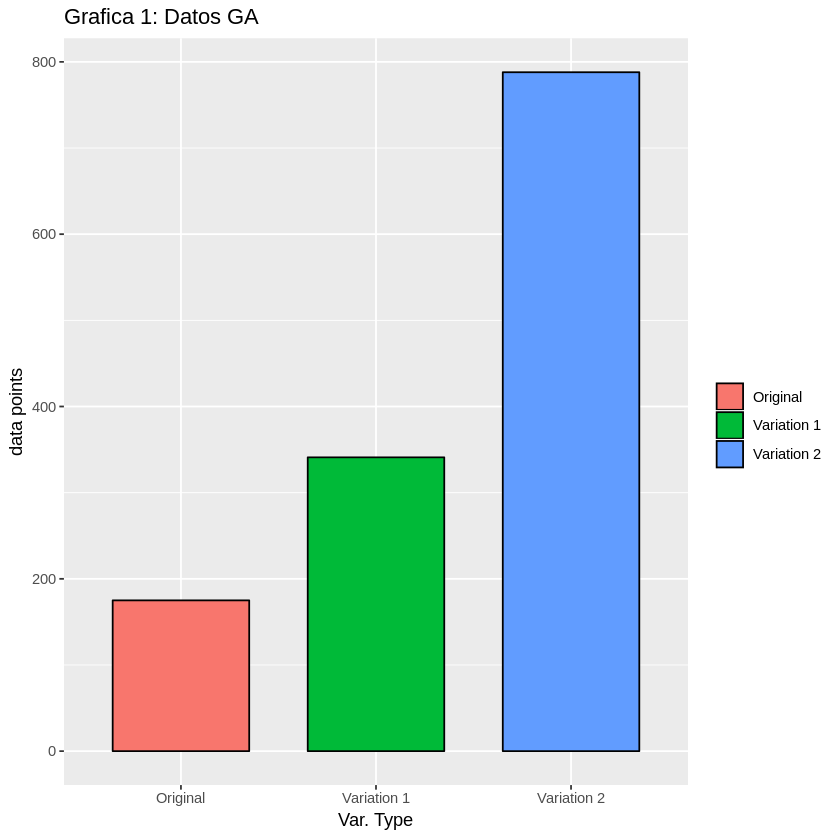

In [52]:

                  
chart1

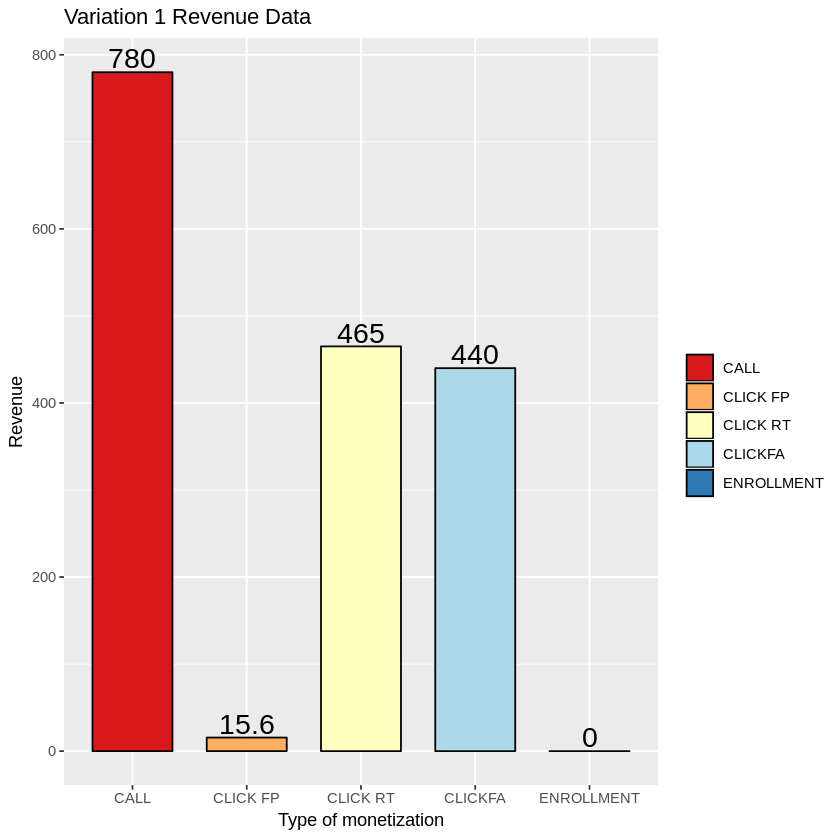

In [151]:
chart2

In [145]:
data_var1

placement,monetization_type,unique_sessions,engagements,revenue,rpm
TYP,CLICK FA,41,44,434.29000,9870
TYP,CLICK FP,8,9,15.68476,1743
TYP,CLICK RT,51,60,464.16830,8926
TYP,ENROLLMENT,1,0,0.00000,0
TYP_CONNECTME,CALL,32,35,765.00000,21857


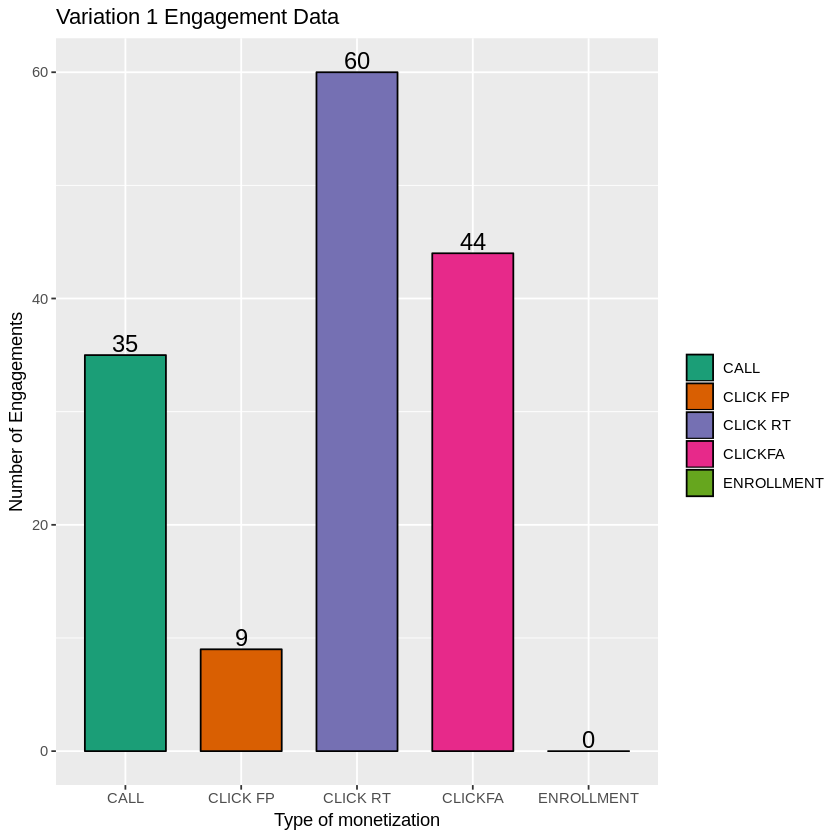

In [152]:
chart2.1

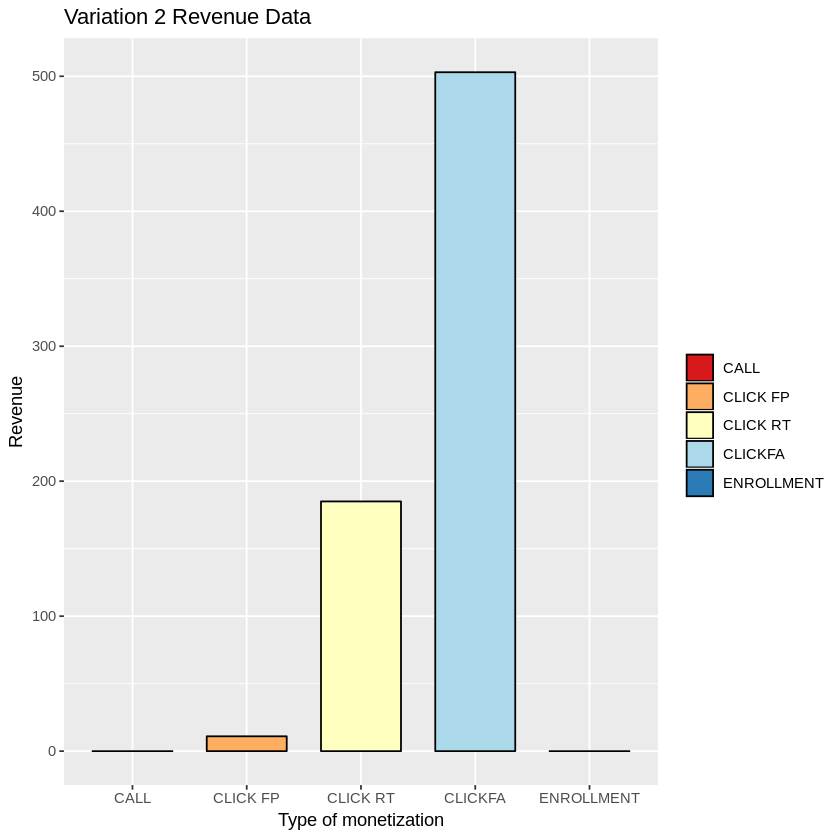

In [106]:
chart3

In [146]:
data_var2

placement,monetization_type,unique_sessions,engagements,revenue,rpm
TYP,CLICK FA,62,68,733.86000,10792
TYP,CLICK FP,17,17,14.92218,878
TYP,CLICK RT,88,93,503.35759,5531
TYP,ENROLLMENT,3,0,0.00000,0
TYP_CONNECTME,CALL,82,83,2200.00000,26506


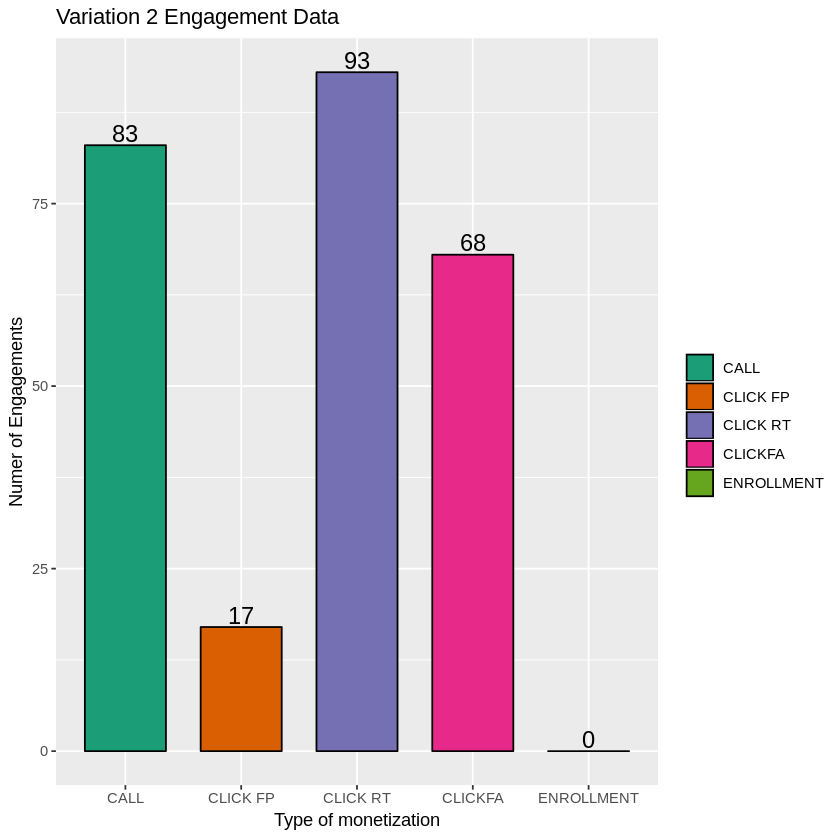

In [153]:
chart3.1

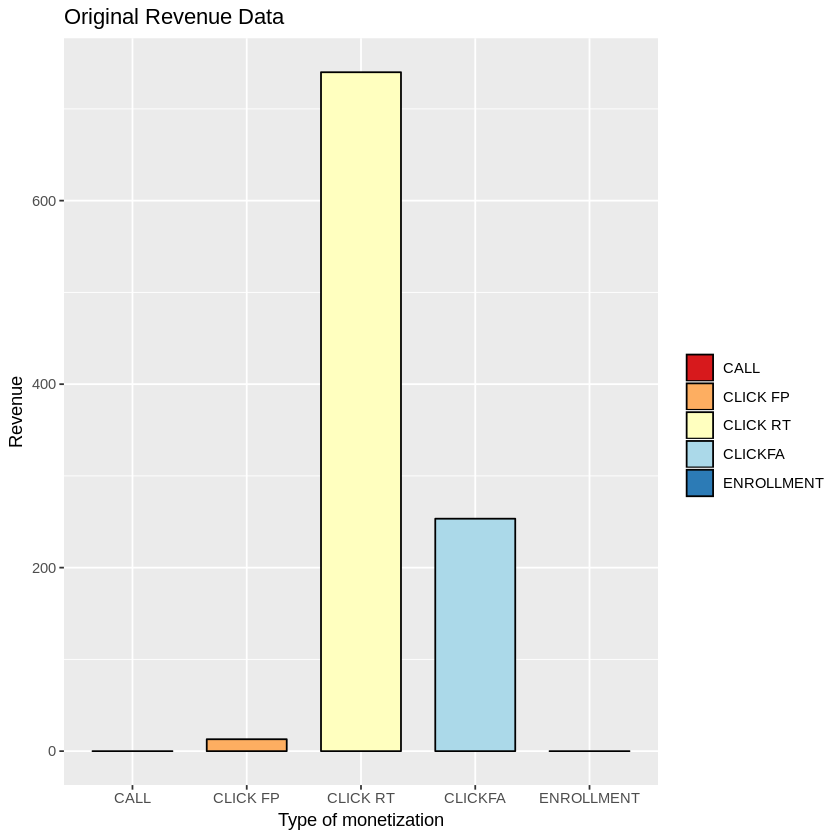

In [154]:
chart4

In [147]:
data_orig

placement,monetization_type,unique_sessions,engagements,revenue,rpm
TYP,CLICK FA,42,44,502.5800,11422
TYP,CLICK FP,11,11,11.7299,1066
TYP,CLICK RT,30,32,184.1602,5755


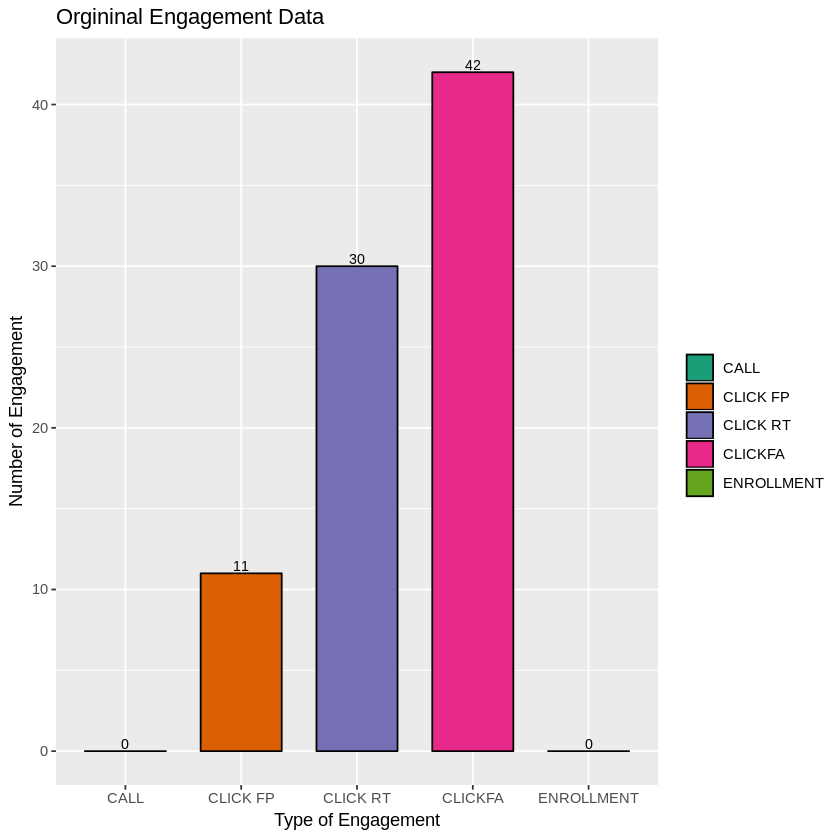

In [155]:
chart4.1

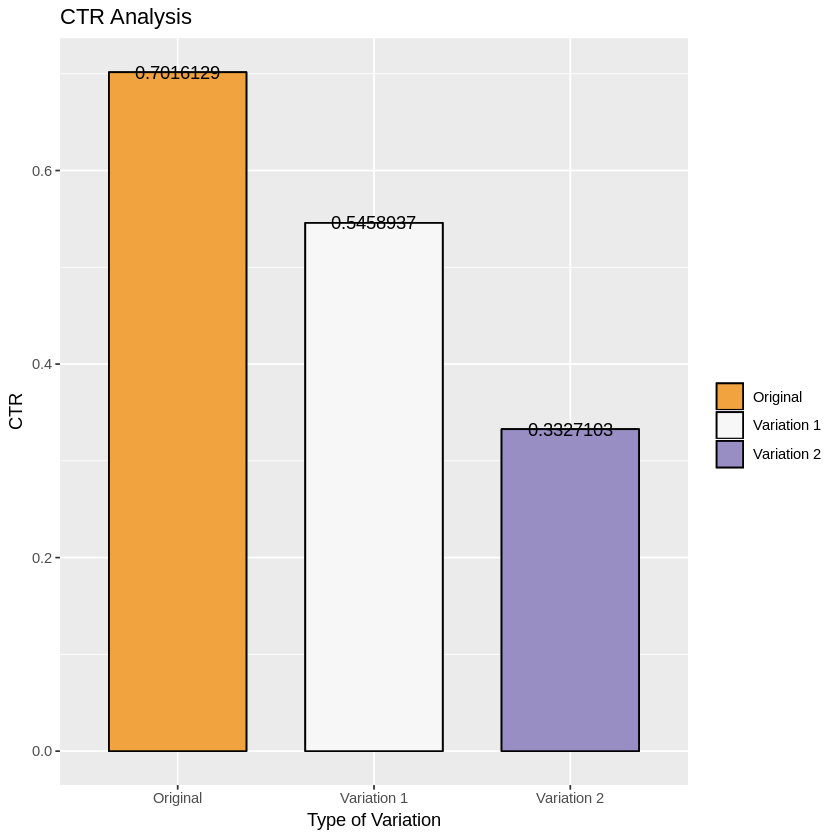

In [157]:
chart5

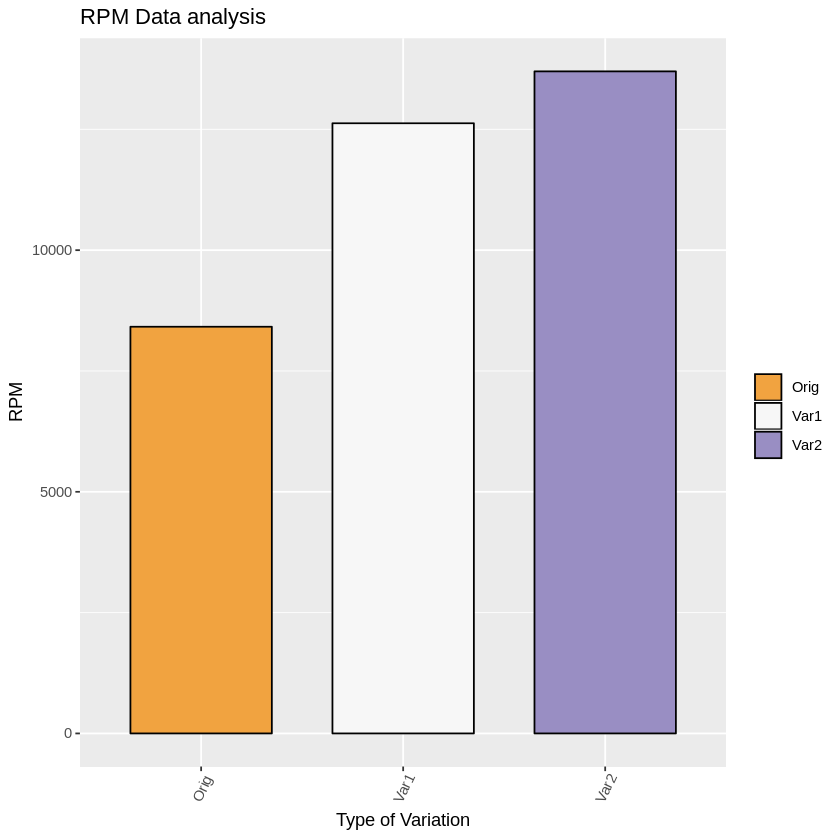

In [158]:
chart6

In [156]:

library(dplyr)
library(dbplyr)
library(tidyverse)
## Importar files ##

callsp <- read.csv("calls_data.csv")
gap <- read.csv("ga_data.csv")
revenuep <- read.csv("revenenue.csv")

## Restrict domain Dates ##

calls <- subset(callsp, as.Date.factor(callsp$process_date) <= "2018-12-24" & 
                  as.Date.factor(callsp$process_date) >="2018-12-18")
ga <- subset(gap, as.Date.factor(gap$date) <= "2018-12-24" &
               as.Date.factor(gap$date)<="2018-12-24")
revenue <- subset(revenuep, as.Date.factor(revenuep$session_revenue_date) <= "2018-12-24" &
                    as.Date.factor(revenuep$session_revenue_date) >= "2018-12-18")


## Borrar undifined/blank ##
calls_limpo <- subset(calls,session_id!="undefined")
# 22 datos filtrados en "calls"
ga_limpio <- subset(ga,hc_session!="undefined")
# 161 datos filtrados en "ga"

## Subsets por experimento ##
variation1 <- subset(ga_limpio, eventLabel=="Variation#1")
variation2 <- subset(ga_limpio, eventLabel=="Variation#2")
original <- subset(ga_limpio,eventLabel=="Original")

Repeatedusers <- which(variation1$hc_session %in% variation2$hc_session)
Repeatedusers2 <- which(original$hc_session %in% variation1$hc_session)
Repeatedusers3 <- which(original$hc_session %in% variation2$hc_session)

RepeatedusersID <- as.data.frame(variation1[Repeatedusers,3])

variation1 <- subset(variation1, !( variation1$hc_session %in% RepeatedusersID$`variation1[Repeatedusers, 3]`))
variation2 <- subset(variation2, !( variation2$hc_session %in% RepeatedusersID$`variation1[Repeatedusers, 3]`))

##Buscando datos de revenue en los datos de Google Analytics##
##para variation 1
which_v1 <- which(revenue$session_id %in% variation1$hc_session)
variation1_revenue<- revenue[which_v1,]

##para variation 2
which_v2 <- which(revenue$session_id %in% variation2$hc_session)
variation_2revenue <- revenue[which_v2,]
length(unique(variation_2revenue$session_id))
##para original
which_o <- which(revenue$session_id %in% original$hc_session)
original_revenue <- revenue[which_o,]


data_var1 <-
  variation1_revenue %>% 
  filter(placement %in% c('TYP', 'TYP_CONNECTME')) %>%
  group_by(placement, monetization_type) %>%
  summarise(unique_sessions=n_distinct(session_id),
            engagements=sum(engagement_count),
            revenue=sum(revenue),
            rpm=round(revenue/n()*1000))
data_var1 %>%
  ungroup() %>%
  summarise(rev=sum(revenue),
            unique_sessions=sum(unique_sessions),
            rpm=rev/unique_sessions*1000) %>% pull(rpm)


data_var2 <-
  variation_2revenue %>% 
  filter(placement %in% c('TYP', 'TYP_CONNECTME')) %>%
  group_by(placement, monetization_type) %>%
  summarise(unique_sessions=n_distinct(session_id),
            engagements=sum(engagement_count),
            revenue=sum(revenue),
            rpm=round(revenue/n()*1000))

data_var2 %>% 
  ungroup() %>% 
  summarise(rev=sum(revenue), 
            unique_sessions=sum(unique_sessions),
            rpm=rev/unique_sessions*1000) %>% pull(rpm)

data_orig <-
  original_revenue %>% 
  filter(placement %in% c('TYP', 'TYP_CONNECTME')) %>%
  group_by(placement, monetization_type) %>%
  summarise(unique_sessions=n_distinct(session_id),
            engagements=sum(engagement_count),
            revenue=sum(revenue),
            rpm=round(revenue/n()*1000))

data_orig %>% 
  ungroup() %>% 
  summarise(rev=sum(revenue), 
            unique_sessions=sum(unique_sessions),
            rpm=rev/unique_sessions*1000) %>% pull(rpm)

original_revenue %>%
  ungroup()%>%
  filter(placement=='TYP' | trimws(placement) == 'LEAD FORM')%>%
  group_by(placement)%>%
  summarise(engagents = sum(engagement_count),
            unique_sessions=n_distinct(session_id)) %>%
  ungroup()%>%
  select(-unique_sessions)%>%
  spread(key = placement, value = engagents)%>%
  mutate(ctr = TYP/`LEAD FORM`) %>% pull(ctr)
  
 
variation_2revenue %>%
  ungroup()%>%
  filter(placement=='TYP' | trimws(placement) == 'LEAD FORM')%>%
  group_by(placement)%>%
  summarise(engagents = sum(engagement_count),
            unique_sessions=n_distinct(session_id)) %>%
  ungroup()%>%
  select(-unique_sessions)%>%
  spread(key = placement, value = engagents)%>%
  mutate(ctr = TYP/`LEAD FORM`) %>% pull(ctr)
 
variation1_revenue %>%
  ungroup()%>%
  filter(placement=='TYP' | trimws(placement) == 'LEAD FORM')%>%
  group_by(placement)%>%
  summarise(engagents = sum(engagement_count),
            unique_sessions=n_distinct(session_id)) %>%
  ungroup()%>%
  select(-unique_sessions)%>%
  spread(key = placement, value = engagents)%>%
  mutate(ctr = TYP/`LEAD FORM`) %>% pull(ctr)

                ##Matching calls with experiment##
var1_calls<- subset(calls,calls$session_id %in% variation1$hc_session)


var2_calls<- subset(calls,calls$session_id %in% variation2$hc_session)


orig_calls<- subset(calls, calls$session_id %in% original$hc_session)
 
              ## Calculando número de sesiones ##
length(unique(variation_2revenue$session_id))
length(unique(variation1_revenue$session_id))
length(unique(original_revenue$session_id))
##Daos
chart1 <- ggplot(pct1, aes(x=lbls, y= slices, fill=lbls))+
  geom_bar(stat="identity", color="black", width = 0.7) + 
labs(fill="", x = "Var. Type", y = "data points", title = "Grafica 1: Datos GA") 

##Var 1
v1_tit <- c("CALL", "CLICKFA", "CLICK FP", "CLICK RT","ENROLLMENT")
revenue_v1<- c("780", "440", "15.6", "465", "0")
num_engagements_v1 <- c("39","46", "10","59", "0")

tavla_v1 <- data.frame(revenue_v1,num_engagements_v1)
tavla_v11 <- t(tavla_v1)


slices1 <- c(780, 440, 15.6, 465, 0)
lbls1 <- c("CALL", "CLICKFA", "CLICK FP", "CLICK RT","ENROLLMENT")
pct3 <- data.frame(slices1,lbls1)

chart2 <- ggplot(pct3, aes(x=lbls1, y=slices1, fill=lbls1)) +
  geom_bar(stat="identity", color="black", width = 0.7)+
  labs(fill="", x = "Type of monetization", y="Revenue", title = "Variation 1 Revenue Data")+
scale_fill_brewer(palette = "RdYlBu")+
geom_text(aes(label=slices1), vjust= -0.2, colour="black",size=6)

slices1.1 <-c(35,44,9,60,0)
lbls1.1 <- c("CALL", "CLICKFA", "CLICK FP", "CLICK RT","ENROLLMENT")
pct3.1 <- data.frame(slices1.1,lbls1.1)

chart2.1 <- ggplot(pct3.1, aes(x=lbls1.1, y=slices1.1, fill=lbls1.1)) +
geom_bar(stat="identity", color="black", width = 0.7)+
labs(fill="", x="Type of monetization", y= "Number of Engagements", title = "Variation 1 Engagement Data")+
scale_fill_brewer(palette = "Dark2")+
geom_text(aes(label=slices1.1), vjust= -0.2, colour= "black", size=5)


##Var2
lbls2 <- c("CALL", "CLICKFA", "CLICK FP", "CLICK RT","ENROLLMENT")
slices2 <- c(0, 503, 11, 185, 0)
pct4 <- data.frame(slices2,lbls2)

chart3 <- ggplot(pct4, aes(x=lbls2, y=slices2, fill=lbls2))+
geom_bar(stat="identity", color="black", width = 0.7)+
labs(fill="", x = "Type of monetization", y="Revenue", title = "Variation 2 Revenue Data")+
scale_fill_brewer(palette = "RdYlBu")+
  geom_text(aes(label=slices2), vjust=-0.2, colour="black", size=3)



lbls2.1 <- c("CALL", "CLICKFA", "CLICK FP", "CLICK RT","ENROLLMENT")
slices2.1 <- c(83,68,17,93,0)
pct4.1 <- data.frame(slices2.1,lbls2.1)

chart3.1 <- ggplot(pct4.1, aes(x=lbls2.1, y=slices2.1, fill=lbls2.1))+
geom_bar(stat="identity", color="black", width = 0.7)+
labs(fill="", x="Type of monetization", y="Numer of Engagements", title ="Variation 2 Engagement Data")+
scale_fill_brewer(palette = "Dark2")+
geom_text(aes(label=slices2.1), vjust=-0.2, colour="black", size=5)


##ORiginal

slices3 <- c(0, 253.35, 13, 740, 0)
lbls3 <- c("CALL", "CLICKFA", "CLICK FP", "CLICK RT","ENROLLMENT")
pct5 <- data.frame(lbls3,slices3)

chart4 <- ggplot(pct5, aes(lbls3,slices3,fill=lbls3))+
  geom_bar(stat="identity", color="black", width = 0.7)+
  labs(fill="", x = "Type of monetization", y="Revenue", title = "Original Revenue Data")+
scale_fill_brewer(palette = "RdYlBu")


lbls4.1 <- c("CALL", "CLICKFA", "CLICK FP", "CLICK RT","ENROLLMENT")
slices4.1 <- c(0,42,11,30,0)
pct5.1 <- data.frame(slices4.1,lbls4.1)

chart4.1 <- ggplot(pct5.1, aes(lbls4.1,slices4.1,fill=lbls4.1))+
  geom_bar(stat = "identity", color="black", width = 0.7)+
  labs(fill="", x = "Type of Engagement", y = "Number of Engagement", title = "Orgininal Engagement Data")+
  scale_fill_brewer(palette = "Dark2")+
  geom_text(aes(label=slices4.1), vjust=-0.2, colour="black", size=3)
  



##CTR

slices4<-c("Variation 1","Variation 2", "Original")
ctr_f12<-c(0.5458937,0.3327103,0.7016129)
ctr_f1 <- data.frame(slices4, ctr_f12)

chart5 <- ggplot(ctr_f1, aes(slices4,ctr_f12,fill=slices4))+
  geom_bar(stat="identity", color="black", width=0.7)+
  geom_bar(stat="identity", color="black", width=0.7)+
  labs(fill="", x="Type of Variation", y="CTR", title = "CTR Analysis")+
  scale_fill_brewer(palette = "PuOr")+
  geom_text(aes(label=ctr_f12), position = "identity")

##RPM
rpm_names <- c("Var1", "Var2", "Orig")
rpm_num <- c(12625.14,13698.97,8415.303)

ctr6<- data.frame(rpm_names,rpm_num)

chart6<-ggplot(ctr6, aes(rpm_names,rpm_num,fill=rpm_names))+
  geom_bar(stat="identity", color="black", width = 0.7)+
  labs(fill="", x = "Type of Variation", y="RPM", title = "RPM Data analysis") + scale_fill_brewer(palette = "PuOr")+ theme(axis.text.x = element_text(angle = 65, vjust = 0.6))






[1] 441

[1] 12625.14

[1] 13698.97

[1] 8415.303

[1] 0.7016129

[1] 0.3327103

[1] 0.5458937

[1] 441

[1] 213

[1] 108